In [10]:
import pandas as pd
import matplotlib.pyplot as plt

data_ = pd.read_excel('data/homicidios.xlsx', sheet_name='HECHOS')

In [11]:
data_.T.isna().sum().sort_values(ascending=False)

119    4
181    3
180    3
106    3
546    3
      ..
243    1
244    1
245    1
246    1
695    1
Length: 696, dtype: int64

In [12]:
def showPie(columna):
  count_values = pd.Series(columna).value_counts()
  if len(count_values) > 15:
    count_values = count_values.iloc[0:15]
  datos = pd.DataFrame({"valor":count_values.index, "ocurrencia": count_values.values})

  plt.title(columna.name)
  plt.pie(datos["ocurrencia"], labels=datos['valor'], autopct='%1.1f%%')
  plt.show()

In [14]:

data = data_.set_index(data_.ID)
data.drop('ID', axis=1, inplace=True,errors='ignore')
data

,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
ID,,,,,,,,,,,,,,,,,,,,
2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,PIEDRA BUENA AV.,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,"PAZ, GRAL. AV.",NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,ENTRE RIOS AV.,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,LARRAZABAL AV.,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,SAN JUAN AV.,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-0093,1,2021-12-13,2021,12,13,17:10:00,17,AV. RIESTRA Y MOM,AVENIDA,RIESTRA AV.,NaN,MOM,RIESTRA AV. y MOM,7,Point (102728.60090138 98186.24929177),-58.43353773,-34.64561636,MOTO-AUTO,MOTO,AUTO
2021-0094,1,2021-12-20,2021,12,20,01:10:00,1,AU DELLEPIANE Y LACARRA,AUTOPISTA,"DELLEPIANE, LUIS, TTE. GRAL.",NaN,LACARRA AV.,"DELLEPIANE, LUIS, TTE. GRAL. y LACARRA AV.",9,Point (99624.29795829 97569.69801131),-58.46739825,-34.65117757,MOTO-AUTO,MOTO,AUTO
2021-0095,1,2021-12-30,2021,12,30,00:43:00,0,AV. GAONA Y TERRADA,AVENIDA,GAONA AV.,NaN,TERRADA,GAONA AV. y TERRADA,11,Point (99116.45492358 101045.23284826),-58.47293407,-34.61984745,MOTO-CARGAS,MOTO,CARGAS


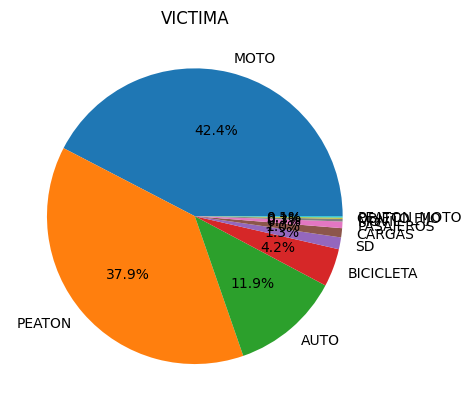

In [15]:
showPie(data['VICTIMA'])

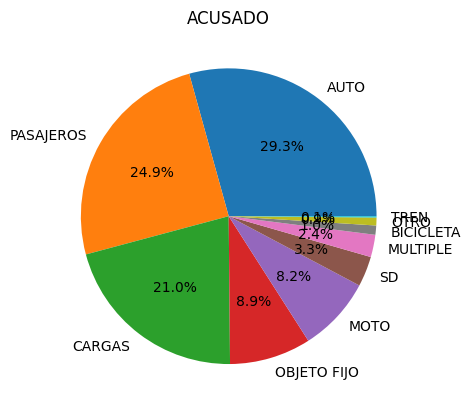

In [16]:
showPie(data['ACUSADO'])

In [18]:
data['ACUSADO'].corr(data['VICTIMA'])

ValueError: could not convert string to float: 'AUTO'

In [72]:
barrios = pd.read_excel('data/barrios.xlsx')
len(barrios.dropna().BARRIO.unique())

48

In [75]:
comunas = pd.read_excel('data/comunas.xlsx')

comunas['barrios'] = comunas.BARRIOS.apply(lambda x: x.split(' - '))

# pd.merge(pd.DataFrame(comunas.barrios.explode()).reset_index(names='comuna_id'), comunas[['ID', 'COMUNAS']], left_on='comuna_id', right_on='ID')
comunas.set_index('COMUNAS', drop=True, inplace=True)
comunas.drop('ID', axis = 1, inplace=True, errors='ignore')
comunas.sort_index()

,OBJETO,BARRIOS,PERIMETRO,AREA,barrios
COMUNAS,,,,,
1,LIMITE COMUNAL,CONSTITUCION - MONTSERRAT - PUERTO MADERO - RE...,36102.201573,1.779457e+07,"[CONSTITUCION, MONTSERRAT, PUERTO MADERO, RETI..."
2,LIMITE COMUNAL,RECOLETA,21452.838648,6.317265e+06,[RECOLETA]
3,LIMITE COMUNAL,BALVANERA - SAN CRISTOBAL,10486.260809,6.385991e+06,"[BALVANERA, SAN CRISTOBAL]"
4,LIMITE COMUNAL,BARRACAS - BOCA - NUEVA POMPEYA - PARQUE PATRI...,35423.282799,2.168464e+07,"[BARRACAS, BOCA, NUEVA POMPEYA, PARQUE PATRICIOS]"
5,LIMITE COMUNAL,ALMAGRO - BOEDO,12323.432479,6.660603e+06,"[ALMAGRO, BOEDO]"
6,LIMITE COMUNAL,CABALLITO,10990.964471,6.851029e+06,[CABALLITO]
7,LIMITE COMUNAL,FLORES - PARQUE CHACABUCO,17972.257870,1.242290e+07,"[FLORES, PARQUE CHACABUCO]"
8,LIMITE COMUNAL,VILLA LUGANO - VILLA RIACHUELO - VILLA SOLDATI,20935.012513,2.221690e+07,"[VILLA LUGANO, VILLA RIACHUELO, VILLA SOLDATI]"
9,LIMITE COMUNAL,LINIERS - MATADEROS - PARQUE AVELLANEDA,21411.738344,1.650531e+07,"[LINIERS, MATADEROS, PARQUE AVELLANEDA]"


In [77]:
pd.merge(pd.DataFrame(comunas.barrios.explode()).reset_index(names='comuna_id'), comunas, left_on='comuna_id', right_on='COMUNAS')

,comuna_id,barrios_x,OBJETO,BARRIOS,PERIMETRO,AREA,barrios_y
0,2,RECOLETA,LIMITE COMUNAL,RECOLETA,21452.838648,6.317265e+06,[RECOLETA]
1,5,ALMAGRO,LIMITE COMUNAL,ALMAGRO - BOEDO,12323.432479,6.660603e+06,"[ALMAGRO, BOEDO]"
2,5,BOEDO,LIMITE COMUNAL,ALMAGRO - BOEDO,12323.432479,6.660603e+06,"[ALMAGRO, BOEDO]"
3,6,CABALLITO,LIMITE COMUNAL,CABALLITO,10990.964471,6.851029e+06,[CABALLITO]
4,7,FLORES,LIMITE COMUNAL,FLORES - PARQUE CHACABUCO,17972.257870,1.242290e+07,"[FLORES, PARQUE CHACABUCO]"
5,7,PARQUE CHACABUCO,LIMITE COMUNAL,FLORES - PARQUE CHACABUCO,17972.257870,1.242290e+07,"[FLORES, PARQUE CHACABUCO]"
6,9,LINIERS,LIMITE COMUNAL,LINIERS - MATADEROS - PARQUE AVELLANEDA,21411.738344,1.650531e+07,"[LINIERS, MATADEROS, PARQUE AVELLANEDA]"
7,9,MATADEROS,LIMITE COMUNAL,LINIERS - MATADEROS - PARQUE AVELLANEDA,21411.738344,1.650531e+07,"[LINIERS, MATADEROS, PARQUE AVELLANEDA]"
8,9,PARQUE AVELLANEDA,LIMITE COMUNAL,LINIERS - MATADEROS - PARQUE AVELLANEDA,21411.738344,1.650531e+07,"[LINIERS, MATADEROS, PARQUE AVELLANEDA]"
9,10,FLORESTA,LIMITE COMUNAL,FLORESTA - MONTE CASTRO - VELEZ SARSFIELD - VE...,18332.037457,1.265656e+07,"[FLORESTA, MONTE CASTRO, VELEZ SARSFIELD, VERS..."


In [63]:
barrio_comuna = pd.DataFrame(comunas.barrios.explode())

,barrios
COMUNAS,
2,RECOLETA
5,ALMAGRO
5,BOEDO
6,CABALLITO
7,FLORES
7,PARQUE CHACABUCO
9,LINIERS
9,MATADEROS
9,PARQUE AVELLANEDA


In [33]:
comunas

,ID,OBJETO,COMUNAS,BARRIOS,PERIMETRO,AREA,barrios
0,1,LIMITE COMUNAL,2,RECOLETA,21452.838648,6.317265e+06,[RECOLETA]
1,2,LIMITE COMUNAL,5,ALMAGRO - BOEDO,12323.432479,6.660603e+06,"[ALMAGRO, BOEDO]"
2,3,LIMITE COMUNAL,6,CABALLITO,10990.964471,6.851029e+06,[CABALLITO]
3,4,LIMITE COMUNAL,7,FLORES - PARQUE CHACABUCO,17972.257870,1.242290e+07,"[FLORES, PARQUE CHACABUCO]"
4,5,LIMITE COMUNAL,9,LINIERS - MATADEROS - PARQUE AVELLANEDA,21411.738344,1.650531e+07,"[LINIERS, MATADEROS, PARQUE AVELLANEDA]"
5,6,LIMITE COMUNAL,10,FLORESTA - MONTE CASTRO - VELEZ SARSFIELD - VE...,18332.037457,1.265656e+07,"[FLORESTA, MONTE CASTRO, VELEZ SARSFIELD, VERS..."
6,7,LIMITE COMUNAL,11,VILLA DEL PARQUE - VILLA DEVOTO - VILLA GRAL....,19987.696155,1.412004e+07,"[VILLA DEL PARQUE, VILLA DEVOTO, VILLA GRAL. ..."
7,8,LIMITE COMUNAL,12,COGHLAN - SAAVEDRA - VILLA PUEYRREDON - VILLA ...,17232.189372,1.557093e+07,"[COGHLAN, SAAVEDRA, VILLA PUEYRREDON, VILLA UR..."
8,9,LIMITE COMUNAL,14,PALERMO,22126.531858,1.584587e+07,[PALERMO]
9,10,LIMITE COMUNAL,3,BALVANERA - SAN CRISTOBAL,10486.260809,6.385991e+06,"[BALVANERA, SAN CRISTOBAL]"


In [50]:
barrios.BARRIO.

array(['CHACARITA', 'PATERNAL', 'VILLA CRESPO', 'VILLA DEL PARQUE',
       'ALMAGRO', 'CABALLITO', 'VILLA SANTA RITA', 'MONTE CASTRO',
       'VILLA REAL', 'FLORES', 'FLORESTA', 'CONSTITUCION',
       'SAN CRISTOBAL', 'BOEDO', 'VELEZ SARSFIELD', 'VILLA LURO',
       'PARQUE PATRICIOS', 'MATADEROS', 'VILLA LUGANO', 'SAN TELMO',
       'SAAVEDRA', 'COGHLAN', 'VILLA URQUIZA', 'COLEGIALES', 'BALVANERA',
       'VILLA GRAL. MITRE', 'PARQUE CHAS', 'AGRONOMIA', 'VILLA ORTUZAR',
       'BARRACAS', 'PARQUE AVELLANEDA', 'PARQUE CHACABUCO',
       'NUEVA POMPEYA', nan, 'PALERMO', 'VILLA RIACHUELO',
       'VILLA SOLDATI', 'VILLA PUEYRREDON', 'VILLA DEVOTO', 'LINIERS',
       'VERSALLES', 'PUERTO MADERO', 'MONSERRAT', 'SAN NICOLAS',
       'BELGRANO', 'RECOLETA', 'RETIRO', 'NUÑEZ', 'BOCA'], dtype=object)

In [22]:
import pandas as pd
import researchpy as rp

# Assuming df is your DataFrame containing the categorical variables
# Let's say 'var1' and 'var2' are the columns representing the categorical variables

data = data.reset_index()

# Create a contingency table (cross-tabulation)
contingency_table = pd.crosstab(data['ACUSADO'], data['VICTIMA'])

# Calculate Cramér's V
cramers_v_result = rp.crosstab(data['ACUSADO'], data['VICTIMA'], 
                                prop= 'cell', 
                                test= 'chi-square', 
                                expected_freqs= True, 
                                
                                correction= False)['results']

cramers_v = cramers_v_result.loc[2, 'results']

print("Cramér's V:", cramers_v)


c:\proyectos\DS\PI\pida-javier-bengolea\.svenv\Lib\site-packages\researchpy\crosstab.py:146: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Pearson Chi-square ( 81.0) = ' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  table.iloc[0,0] = f"Pearson Chi-square ({dof: .1f}) = "


TypeError: tuple indices must be integers or slices, not str